<a href="https://colab.research.google.com/github/Groveramit/SelfDrivingCar/blob/master/SelfDrivingCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Groveramit/SelfDrivingCar

Cloning into 'SelfDrivingCar'...
remote: Enumerating objects: 14514, done.
remote: Total 14514 (delta 0), reused 0 (delta 0), pack-reused 14514
Receiving objects: 100% (14514/14514), 183.66 MiB | 13.81 MiB/s, done.
Checking out files: 100% (14512/14512), done.


In [20]:
import os
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout,Flatten, Dense
import cv2
import pandas as pd
import random
import ntpath


In [17]:
datadir='SelfDrivingCar/TrainingData'
columns=['center','left','right','steering','throttle','reverse','speed']
data=pd.read_csv(os.path.join(datadir,'driving_log.csv'),names=columns)
pd.set_option('display.max_colwidth',-1)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\center_2020_09_18_17_42_38_450.jpg,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\left_2020_09_18_17_42_38_450.jpg,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\right_2020_09_18_17_42_38_450.jpg,0.0,0.0,0,0.000082
1,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\center_2020_09_18_17_42_38_552.jpg,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\left_2020_09_18_17_42_38_552.jpg,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\right_2020_09_18_17_42_38_552.jpg,0.0,0.0,0,0.000081
2,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\center_2020_09_18_17_42_38_656.jpg,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\left_2020_09_18_17_42_38_656.jpg,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\right_2020_09_18_17_42_38_656.jpg,0.0,0.0,0,0.000078
3,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\center_2020_09_18_17_42_38_757.jpg,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\left_2020_09_18_17_42_38_757.jpg,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\right_2020_09_18_17_42_38_757.jpg,0.0,0.0,0,0.000082
4,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\center_2020_09_18_17_42_38_861.jpg,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\left_2020_09_18_17_42_38_861.jpg,C:\Users\Neha Gupta.DESKTOP-23F4KUG\Downloads\simulator-windows-64\IMG\right_2020_09_18_17_42_38_861.jpg,0.0,0.0,0,0.000079


In [24]:
def path_leaf(path):
  head,tail=ntpath.split(path)
  return tail
data['center']=data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2020_09_18_17_42_38_450.jpg,left_2020_09_18_17_42_38_450.jpg,right_2020_09_18_17_42_38_450.jpg,0.0,0.0,0,0.000082
1,center_2020_09_18_17_42_38_552.jpg,left_2020_09_18_17_42_38_552.jpg,right_2020_09_18_17_42_38_552.jpg,0.0,0.0,0,0.000081
2,center_2020_09_18_17_42_38_656.jpg,left_2020_09_18_17_42_38_656.jpg,right_2020_09_18_17_42_38_656.jpg,0.0,0.0,0,0.000078
3,center_2020_09_18_17_42_38_757.jpg,left_2020_09_18_17_42_38_757.jpg,right_2020_09_18_17_42_38_757.jpg,0.0,0.0,0,0.000082
4,center_2020_09_18_17_42_38_861.jpg,left_2020_09_18_17_42_38_861.jpg,right_2020_09_18_17_42_38_861.jpg,0.0,0.0,0,0.000079


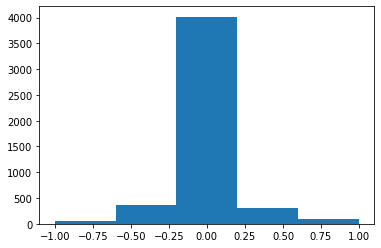

In [32]:
num_bins=25
plt.hist(data['steering'],5)
plt.show()
